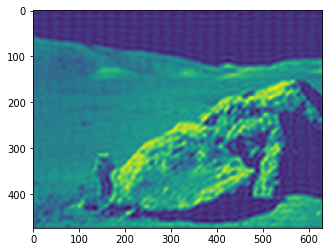

In [3]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

img0=plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
img=fftpack.fft2(img0,axes=(0,1))
fraction=0.07
img1=img.copy()
r,c=img1.shape
img1[int(r*fraction):int(r*(1-fraction))]=0
img1[:,int(c*fraction):int(c*(1-fraction))]=0
img2=fftpack.ifft2(img1).real

plt.imshow(img2)
plt.show()

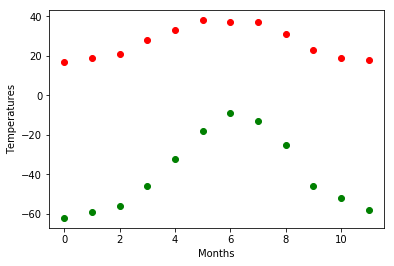

In [13]:
from scipy import optimize

def f(times,avg,ampl,time_offset):
    return (avg+ampl*np.cos((times+time_offset)*2*np.pi/times.max()))


temp_max=np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months=np.arange(12)
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'go')
plt.xlabel('Months')
plt.ylabel('temperatures')
res_max,cov_max=optimize.curve_fit(f,months,temp_max,[20, 10, 0])
res_min,cov_min=optimize.curve_fit(f,months,temp_min,[-40, 20, 0])
days=np.linspace(0,12,365)
plt.xlabel('Months')
plt.ylabel('Temperatures')

plt.show()

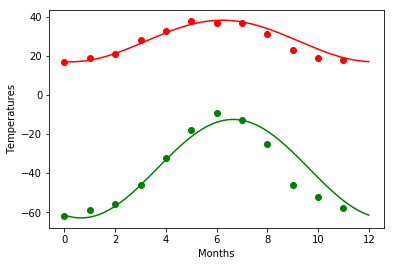

In [9]:
plt.plot(months,temp_max,'ro')
plt.plot(days,f(days,*res_max),'r-')
plt.plot(months,temp_min,'go')
plt.plot(days,f(days, *res_min),'g-')
plt.xlabel('Months')
plt.ylabel('Temperatures')

plt.show()

In [34]:
from mpl_toolkits.mplot3d import Axes3D
def sixhump(x):
    return (4-2.1*x[0]**2+x[0]**4/3.)*x[0]**2+x[0]*x[1]+(-4+4*x[1]**2)*x[1]**2

x=np.linspace(-1,1)
y=np.linspace(-1,1)
x1,y1=np.meshgrid(x,y)
xmin=optimize.fmin_bfgs(sixhump,(0,0))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


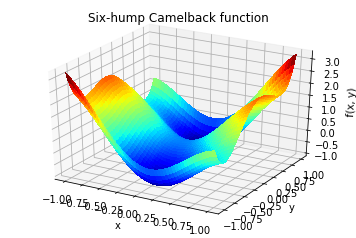

In [21]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(x1,y1,sixhump([x1,y1]),rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

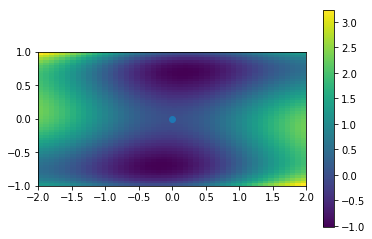

In [20]:
plt.figure()
plt.imshow(sixhump([x1,y1]),extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(xmin[0],xmin[1])
plt.show()

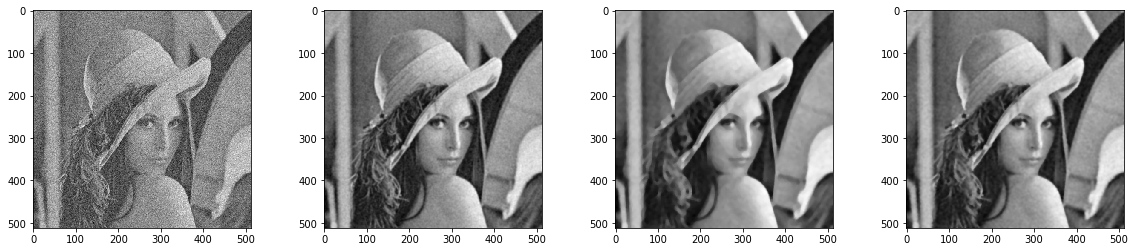

In [30]:
from scipy import misc
from scipy import signal
from scipy import ndimage
lena=plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')
noisy_lena=np.copy(lena).astype(np.float)
noisy_lena+=lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena=ndimage.gaussian_filter(noisy_lena,sigma=1.5)
median_lena=ndimage.median_filter(blurred_lena,size=9)
wiener_lena=signal.wiener(blurred_lena,(5,5))

fig, gr=plt.subplots(1, 4, figsize=(20, 4))
gr[0].imshow(noisy_lena, cmap='gray')
gr[1].imshow(blurred_lena, cmap='gray')
gr[2].imshow(median_lena, cmap='gray')
gr[3].imshow(wiener_lena, cmap='gray')
plt.show()

In [39]:
a=np.zeros((7,7),dtype=np.int)
a[1:5,1:5]=1
a[5,5]=1
a[0,0]=1
print(ndimage.binary_opening(a).astype(np.int))
b=ndimage.binary_erosion(a).astype(a.dtype)
b=ndimage.binary_dilation(b).astype(a.dtype)
print(b)

[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0]
 [0 1 1 1 1 0 0]
 [0 1 1 1 1 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [16]:
a=np.zeros((50,50))
a[10:-10,10:-10]=1
a+=0.25*np.random.standard_normal(a.shape)
mask=(a>=0.5)
mask_open=ndimage.binary_opening(mask)
mask_close=ndimage.binary_closing(mask_open)
init=30*30
init-np.sum(mask_close)

11